<a href="https://colab.research.google.com/github/Nicohim87/DeepLearning-AOL/blob/main/AOL_DeepLearning_Ctrl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [69]:
import kagglehub

# Download latest version
DATASET_PATH = kagglehub.dataset_download("dionisiusdh/indonesian-batik-motifs")

print("Path to dataset files:", DATASET_PATH)

Path to dataset files: /root/.cache/kagglehub/datasets/dionisiusdh/indonesian-batik-motifs/versions/1


In [70]:
img = tf.keras.utils.load_img(os.path.join(DATASET_PATH, 'batik-kawung/1.jpg'), color_mode='grayscale')
img = tf.keras.utils.img_to_array(img)
img.shape

(1772, 1776, 1)

In [71]:
CHOSEN_CLASSNAME = ['batik-betawi', 'batik-kawung', 'batik-parang']
INPUT_SHAPE = (400, 400)

images = []
classes = []

In [72]:
for i, classname in enumerate(CHOSEN_CLASSNAME):
    for j, filename in enumerate(os.listdir(os.path.join(DATASET_PATH, classname))):
        img = tf.keras.utils.load_img(os.path.join(DATASET_PATH, classname, filename), color_mode='grayscale', target_size=INPUT_SHAPE)
        img = tf.keras.utils.img_to_array(img)
        img = img/255
        images.append(img)
        classes.append(i)

In [73]:
images = np.array(images)
classes = np.array(classes)

In [74]:
y = tf.keras.utils.to_categorical(classes, num_classes=len(CHOSEN_CLASSNAME))
y.shape

(145, 3)

In [75]:
images.shape

(145, 400, 400, 1)

# **Train Test Splitting**

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_temp, y_train, y_temp = train_test_split(images, y, test_size=0.7)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

[]

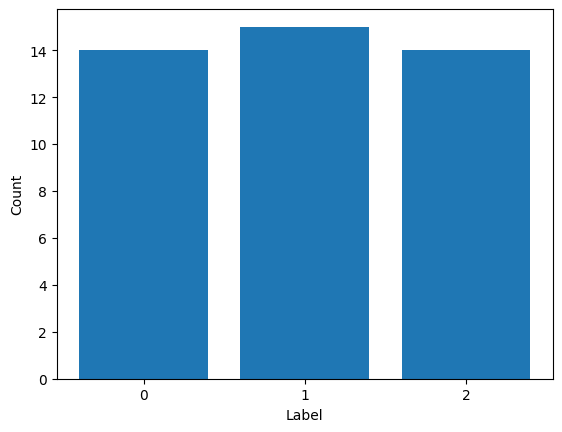

In [78]:
ylabel = [np.argmax(i) for i in y_train]

label, count = np.unique(ylabel, return_counts=True) # Menghitung jumlah kemunculan dari suatu label
# Plotting
plt.bar(label, count)
plt.ylabel("Count")
plt.xlabel("Label")
plt.xticks(label)
plt.plot()

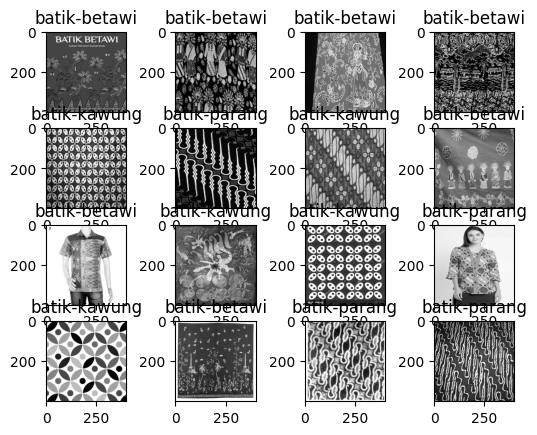

In [79]:
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(CHOSEN_CLASSNAME[np.argmax(y_train[i])])

# **Model**

In [80]:
from tensorflow.keras.optimizers import Adam

In [81]:
EPOCHS = 50
BATCH_SIZE = 15
LEARNING_RATE = 1e-5

In [82]:
input = tf.keras.layers.Input(shape=x_train[0].shape)

x = tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu')(input)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

x = tf.keras.layers.Conv2D(16, kernel_size=(3,3), strides=(1,1), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128, activation='tanh')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(32)(x)
x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
x = tf.keras.layers.BatchNormalization()(x)

output = tf.keras.layers.Dense(len(CHOSEN_CLASSNAME), activation='softmax')(x)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [83]:
model= tf.keras.Model(inputs=input, outputs=output)


optimizer = Adam(learning_rate = LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 400, 400, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 398, 398, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 199, 199, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 197, 197, 16)        │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 98, 98, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 98, 98, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 153664)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      19,669,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,678,931 (75.07 MB)

 Trainable params: 19,678,611 (75.07 MB)

 Non-trainable params: 320 (1.25 KB)

In [84]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

hist = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = EPOCHS, batch_size = BATCH_SIZE,  callbacks=[early_stopping])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4310 - loss: 1.3185 - val_accuracy: 0.3922 - val_loss: 1.0909
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.5141 - loss: 1.0435 - val_accuracy: 0.3922 - val_loss: 1.0819
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6056 - loss: 0.8248 - val_accuracy: 0.3529 - val_loss: 1.0803
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7521 - loss: 0.6375 - val_accuracy: 0.3529 - val_loss: 1.0817
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8153 - loss: 0.4743 - val_accuracy: 0.3529 - val_loss: 1.0816
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8436 - loss: 0.3824 - val_accuracy: 0.3529 - val_loss: 1.0803
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9002 - loss: 0.2883 - val_accuracy: 0.3529 - val_loss: 1.0785
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8269 - loss: 0.3782 - val_accuracy: 0.3333 - val_loss: 1.0781
E

# **Evaluation**

In [85]:
from sklearn import metrics

In [86]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 1)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2429 - loss: 1.1466
Loss: 1.1404571533203125
Accuracy: 0.2549019753932953


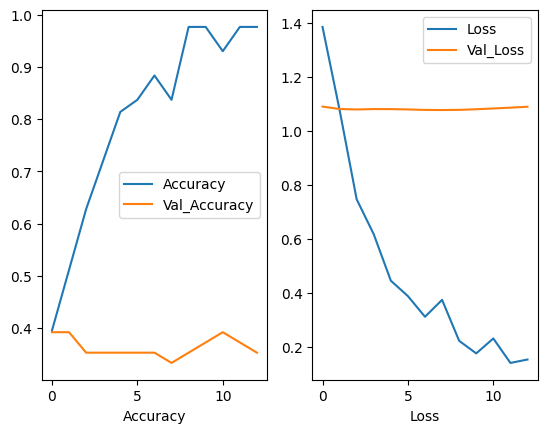

In [87]:
# Accuracy
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend(['Accuracy', "Val_Accuracy"])

# Loss
plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend(['Loss', "Val_Loss"])

# Tampilkan Plot
plt.show()

In [88]:
pred = model.predict(x_test) # Flatten untuk memastikan bahwa output hanya berupa 1D array

pred = [CHOSEN_CLASSNAME[np.argmax(i)] for i in pred] # Mendecode hasil prediksi nya, index perlu di bulatkan karena fungsi sigmoid normalnya tidak menghasilkan bilangan bulat
actual = [CHOSEN_CLASSNAME[np.argmax(i)] for i in y_test] # Mendecode nilai asli nya

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step


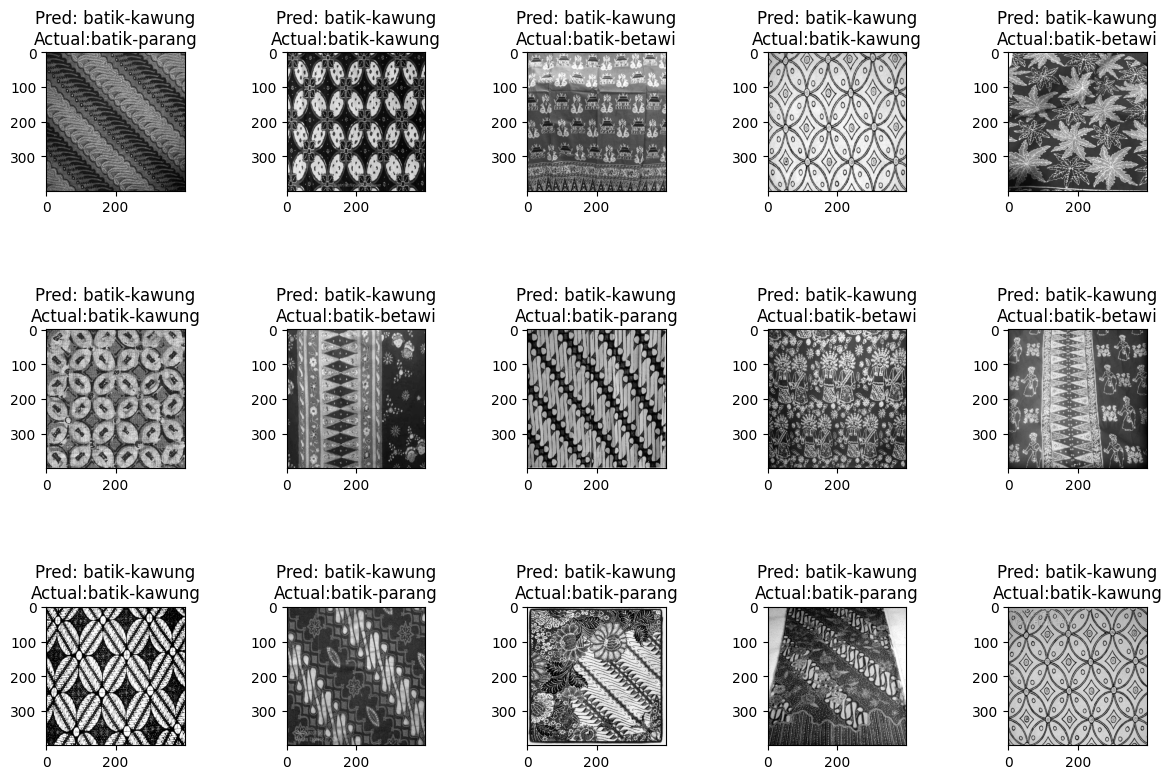

In [89]:
plt.figure(figsize=(15,9)) # Menentukan ukuran plot
for i in range(15):
    plt.subplot(3, 5, i+1) # Menentukan lokasi subplot nya
    plt.imshow(x_test[i], cmap='gray') # Menampilkan gambar

    plt.title(f"Pred: {pred[i]}\nActual:{actual[i]}") # Menampilkan actual value dan prediction nya

plt.subplots_adjust(hspace=1)

In [90]:
print(metrics.classification_report(pred, actual))

              precision    recall  f1-score   support

batik-betawi       0.00      0.00      0.00         1
batik-kawung       0.93      0.26      0.41        50
batik-parang       0.00      0.00      0.00         0

    accuracy                           0.25        51
   macro avg       0.31      0.09      0.14        51
weighted avg       0.91      0.25      0.40        51



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


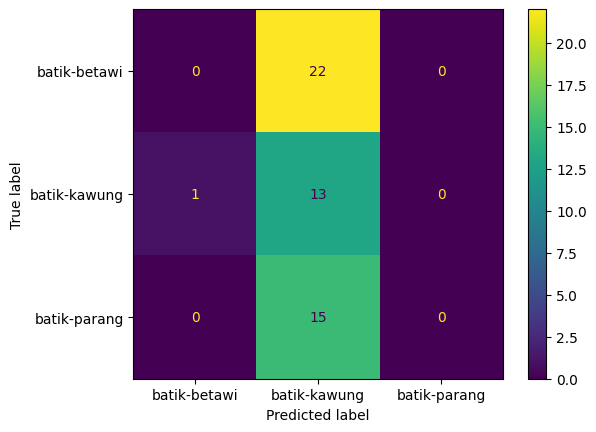

In [91]:
CM = metrics.confusion_matrix(actual, pred) # Membuat confusion matrix nya
fig = metrics.ConfusionMatrixDisplay(CM, display_labels=CHOSEN_CLASSNAME) # Display labels agar label yang ditunjukan sudah di decode
fig.plot() # Plot confusion matrix nya